In [2]:
#Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])  # converting job_posted_date to datetime object
df['job_skills'] = df['job_skills'].apply(lambda data: ast.literal_eval(data) if pd.notna(data) else data)  # converting job_skills to list

# Examples

In [3]:
# Only get data analyst jobs in the United States
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US['salary_year_avg'].sample(10)

189626    110000.0
543890     80000.0
124391     74712.0
186343     88437.5
270262    115000.0
672548     90000.0
154420     90000.0
559140     65037.5
670566    115000.0
541369     70000.0
Name: salary_year_avg, dtype: float64

<Axes: >

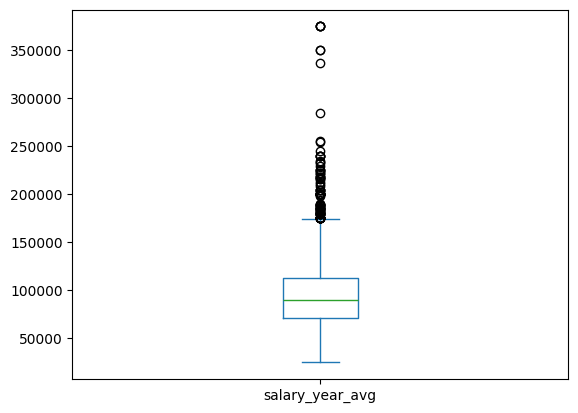

In [4]:
df_DA_US['salary_year_avg'].plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x70c687a70d00>,
 'caps': [<matplotlib.lines.Line2D at 0x70c687a71360>,
 'boxes': [<matplotlib.lines.Line2D at 0x70c687a70c70>],
 'medians': [<matplotlib.lines.Line2D at 0x70c687a71600>],
 'fliers': [<matplotlib.lines.Line2D at 0x70c687a71ba0>],
 'means': []}

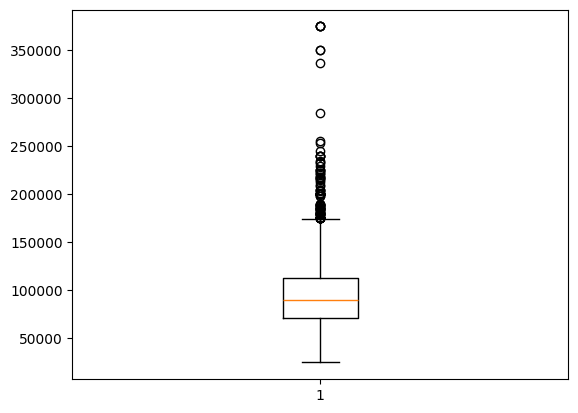

In [5]:
plt.boxplot(df_DA_US['salary_year_avg'])

<Axes: >

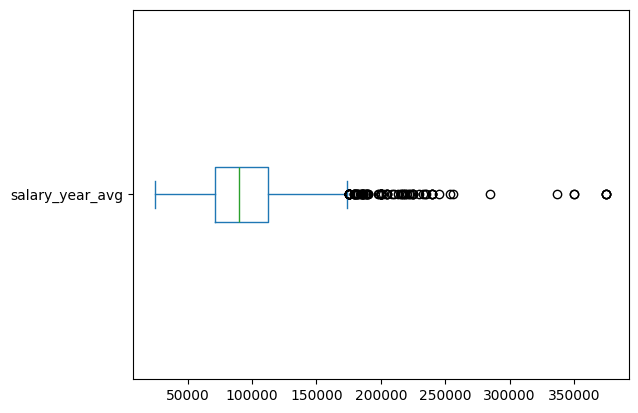

In [6]:
df_DA_US['salary_year_avg'].plot(kind='box', vert=False)

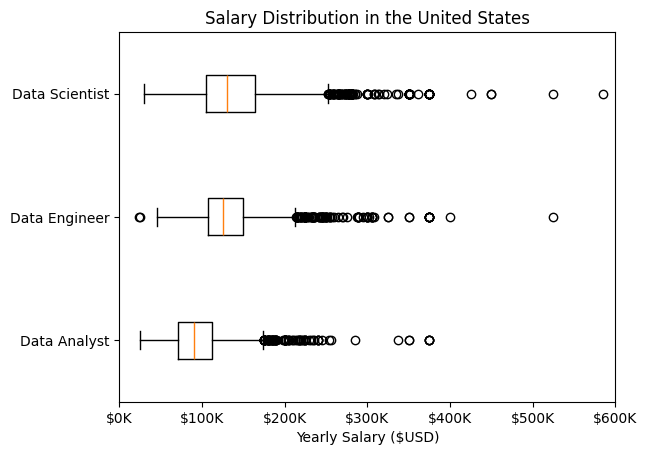

In [7]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist'] 

# Filter the data to appropriate job_titles; Only get data analyst jobs
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()

df_US = df_US.dropna(subset=['salary_year_avg']) 

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, tick_labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

# Exercises

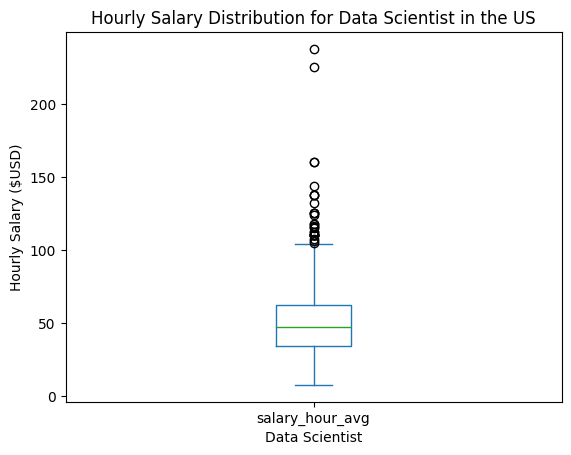

In [12]:
# Create a box plot to visualize the distribution of salary_hour_avg for Data Scientist job postings in the United States. Label the x-axis as 'Data Scientist' and the y-axis as 'Hourly Salary ($USD)'.

df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()
df_DS_US.dropna(subset=['salary_hour_avg'])

df_DS_US['salary_hour_avg'].plot(kind='box')
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.title('Hourly Salary Distribution for Data Scientist in the US')
plt.show()

/tmp/ipykernel_7669/2176041231.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(countries_list, labels=countries)


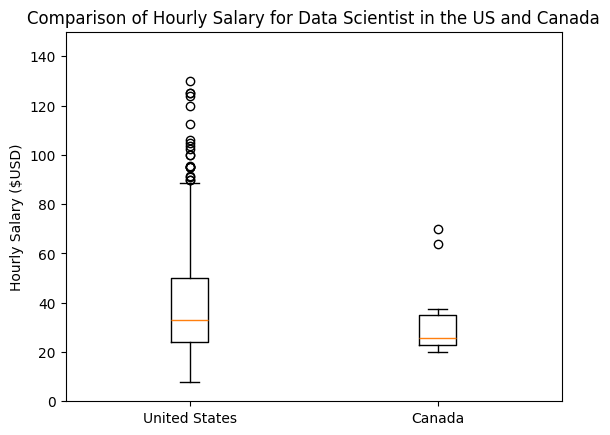

In [21]:
# Create a box plot to compare the distribution of salary_hour_avg for Data Analyst job postings in the United States and Canada.
# 
# Filter a DataFrame to include only 'Data Analyst' roles in these two countries.
# Use list comprehension to create a list of DataFrames for each country.
# Use the plt.boxplot() function to plot this list and specify the labels as countries.
# Set the y-axis limit to 150 and the y-axis as 'Hourly Salary ($USD)'.

countries = ['United States', 'Canada']

df_DA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'].isin(countries))].copy()
df_DA = df_DA.dropna(subset=['salary_hour_avg'])

countries_list = [df_DA[df_DA['job_country'] == country]['salary_hour_avg'] for country in countries]
plt.boxplot(countries_list, labels=countries)
plt.xlabel('')
plt.ylabel('Hourly Salary ($USD)')
plt.ylim(0, 150)
plt.title('Comparison of Hourly Salary for Data Scientist in the US and Canada')
plt.show()

/tmp/ipykernel_7669/1175820456.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(roles_list, labels=job_titles)


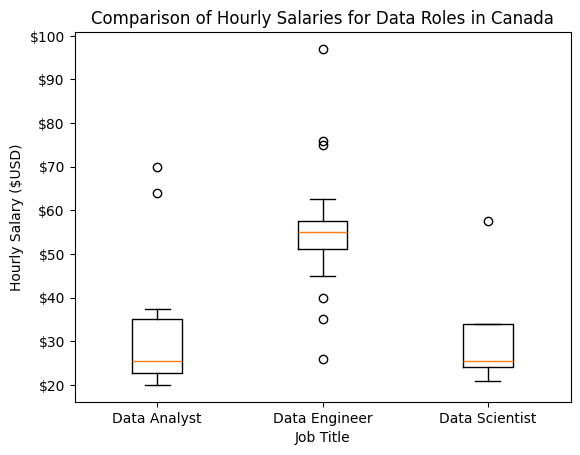

In [23]:
# Create a box plot to compare the distribution of salary_hour_avg for Data Analyst, Data Engineer, and Data Scientist job postings in Canada.
# Label the x-axis as 'Job Title' and format the y-axis to have '$' before the number then label it as 'Hourly Salary (USD)'.

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_Can = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'Canada')].copy().dropna(subset=['salary_hour_avg'])

roles_list = [df_Can[df_Can['job_title_short'] == job_title]['salary_hour_avg'] for job_title in job_titles]

fig, ax = plt.subplots()
ax.boxplot(roles_list, labels=job_titles)
ax.set_xlabel('Job Title')
ax.set_ylabel('Hourly Salary ($USD)')
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x)}'))
ax.set_title('Comparison of Hourly Salaries for Data Roles in Canada')
plt.show()
